In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn import preprocessing 
from sklearn.decomposition import PCA 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score



In [4]:
df = pd.read_csv("CarPrice.csv")


In [5]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [7]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [8]:
df.sample(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
67,68,-1,buick electra 225 custom,diesel,turbo,four,sedan,rwd,front,110.0,...,183,idi,3.58,3.64,21.5,123,4350,22,25,25552.0
16,17,0,bmw x5,gas,std,two,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182,5400,16,22,41315.0
65,66,0,mazda glc,gas,std,four,sedan,rwd,front,104.9,...,140,mpfi,3.76,3.16,8.0,120,5000,19,27,18280.0
182,183,2,vokswagen rabbit,diesel,std,two,sedan,fwd,front,97.3,...,97,idi,3.01,3.40,23.0,52,4800,37,46,7775.0
80,81,3,mitsubishi mirage g4,gas,turbo,two,hatchback,fwd,front,96.3,...,110,spdi,3.17,3.46,7.5,116,5500,23,30,9959.0


In [9]:
df_2 = df.drop(['car_ID','CarName'] , axis = 1)

In [10]:
df_2

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [11]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   fueltype          205 non-null    object 
 2   aspiration        205 non-null    object 
 3   doornumber        205 non-null    object 
 4   carbody           205 non-null    object 
 5   drivewheel        205 non-null    object 
 6   enginelocation    205 non-null    object 
 7   wheelbase         205 non-null    float64
 8   carlength         205 non-null    float64
 9   carwidth          205 non-null    float64
 10  carheight         205 non-null    float64
 11  curbweight        205 non-null    int64  
 12  enginetype        205 non-null    object 
 13  cylindernumber    205 non-null    object 
 14  enginesize        205 non-null    int64  
 15  fuelsystem        205 non-null    object 
 16  boreratio         205 non-null    float64
 1

In [12]:
df_2.fillna(method='ffill',inplace=True)

In [13]:
df_2_cont=df_2.select_dtypes(include='number')

In [14]:
df_2_cont

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470.0


In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_2_count_std  = scaler.fit_transform(df_2_cont)

In [16]:
df_2_count_std

array([[ 1.74347043, -1.6907718 , -0.42652147, ..., -0.64655303,
        -0.54605874,  0.02739114],
       [ 1.74347043, -1.6907718 , -0.42652147, ..., -0.64655303,
        -0.54605874,  0.4044611 ],
       [ 0.133509  , -0.70859588, -0.23151305, ..., -0.95301169,
        -0.69162706,  0.4044611 ],
       ...,
       [-1.47645244,  1.72187336,  1.19854871, ..., -1.10624102,
        -1.12833203,  1.02998314],
       [-1.47645244,  1.72187336,  1.19854871, ...,  0.11959362,
        -0.54605874,  1.15358178],
       [-1.47645244,  1.72187336,  1.19854871, ..., -0.95301169,
        -0.83719538,  1.17303131]])

In [17]:
type(df_2_count_std)
print(df_2_count_std.shape)
df_2_count_std = pd.DataFrame(df_2_count_std, columns = df_2_cont.columns)

(205, 15)


In [18]:
df_2_count_std

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1.743470,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,0.519071,-1.839377,-0.288349,0.174483,-0.262960,-0.646553,-0.546059,0.027391
1,1.743470,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,0.519071,-1.839377,-0.288349,0.174483,-0.262960,-0.646553,-0.546059,0.404461
2,0.133509,-0.708596,-0.231513,-0.190566,-0.543527,0.514882,0.604046,-2.404880,0.685946,-0.288349,1.264536,-0.262960,-0.953012,-0.691627,0.404461
3,0.938490,0.173698,0.207256,0.136542,0.235942,-0.420797,-0.431076,-0.517266,0.462183,-0.035973,-0.053668,0.787855,-0.186865,-0.109354,0.084485
4,0.938490,0.107110,0.207256,0.230001,0.235942,0.516807,0.218885,-0.517266,0.462183,-0.540725,0.275883,0.787855,-1.106241,-1.273900,0.523668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1.476452,1.721873,1.198549,1.398245,0.728239,0.763241,0.339248,1.666445,-0.336970,-0.162161,0.250533,0.577692,-0.340094,-0.400490,0.447752
201,-1.476452,1.721873,1.198549,1.351515,0.728239,0.949992,0.339248,1.666445,-0.336970,-0.364062,1.416637,0.367529,-0.953012,-0.837195,0.723810
202,-1.476452,1.721873,1.198549,1.398245,0.728239,0.878757,1.109571,0.926204,-1.232021,-0.338824,0.757535,0.787855,-1.106241,-1.128332,1.029983
203,-1.476452,1.721873,1.198549,1.398245,0.728239,1.273437,0.435538,-1.183483,0.462183,3.244916,0.047732,-0.683286,0.119594,-0.546059,1.153582


In [19]:
df_2_count_std_corr = df_2_count_std.corr()

In [20]:
lower = pd.DataFrame(np.tril(df_2_count_std_corr, -1),columns = df_2_count_std.columns)

In [21]:
lower

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,-0.531954,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2,-0.357612,0.874587,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
3,-0.232919,0.795144,0.841118,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
4,-0.541038,0.589435,0.491029,0.279210,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
5,-0.227691,0.776386,0.877728,0.867032,0.295572,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
6,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
7,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
8,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
9,-0.178515,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005197,0.186110,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


In [22]:
to_drop = [column for column in lower if any(lower[column] > 0.86)]

In [23]:
to_drop

['wheelbase', 'carlength', 'carwidth', 'enginesize', 'citympg']

In [24]:
df_2_lower_droped_std = df_2_count_std.drop(to_drop , axis = 1 )

In [25]:
df_2_lower_droped_std

,symboling,carheight,curbweight,boreratio,stroke,compressionratio,horsepower,peakrpm,highwaympg,price
0,1.743470,-2.020417,-0.014566,0.519071,-1.839377,-0.288349,0.174483,-0.262960,-0.546059,0.027391
1,1.743470,-2.020417,-0.014566,0.519071,-1.839377,-0.288349,0.174483,-0.262960,-0.546059,0.404461
2,0.133509,-0.543527,0.514882,-2.404880,0.685946,-0.288349,1.264536,-0.262960,-0.691627,0.404461
3,0.938490,0.235942,-0.420797,-0.517266,0.462183,-0.035973,-0.053668,0.787855,-0.109354,0.084485
4,0.938490,0.235942,0.516807,-0.517266,0.462183,-0.540725,0.275883,0.787855,-1.273900,0.523668
...,...,...,...,...,...,...,...,...,...,...
200,-1.476452,0.728239,0.763241,1.666445,-0.336970,-0.162161,0.250533,0.577692,-0.400490,0.447752
201,-1.476452,0.728239,0.949992,1.666445,-0.336970,-0.364062,1.416637,0.367529,-0.837195,0.723810
202,-1.476452,0.728239,0.878757,0.926204,-1.232021,-0.338824,0.757535,0.787855,-1.128332,1.029983
203,-1.476452,0.728239,1.273437,-1.183483,0.462183,3.244916,0.047732,-0.683286,-0.546059,1.153582


df_2 only catagories type 

In [26]:
df_2_cata = df_2.drop(df_2_cont.columns ,axis = 1)

In [27]:
df_2_cata

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,gas,std,four,sedan,4wd,front,ohc,five,mpfi
...,...,...,...,...,...,...,...,...,...
200,gas,std,four,sedan,rwd,front,ohc,four,mpfi
201,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi
202,gas,std,four,sedan,rwd,front,ohcv,six,mpfi
203,diesel,turbo,four,sedan,rwd,front,ohc,six,idi


df_2 only continuous type 

In [28]:
# df_2_cont

In [29]:
# onehot
onehot_df2_cata = pd.get_dummies(df_2_cata , columns=df_2_cata.columns)

In [30]:
onehot_df2_cata

,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,0,1,1,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,1,1,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,1,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,1,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,0,1,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0,1,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
201,0,1,0,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
202,0,1,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
203,1,0,0,1,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [31]:
df_3 = pd.concat([df_2_lower_droped_std,onehot_df2_cata],axis=1)

In [32]:
df_3

,symboling,carheight,curbweight,boreratio,stroke,compressionratio,horsepower,peakrpm,highwaympg,price,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1.743470,-2.020417,-0.014566,0.519071,-1.839377,-0.288349,0.174483,-0.262960,-0.546059,0.027391,...,0,0,0,0,0,0,0,1,0,0
1,1.743470,-2.020417,-0.014566,0.519071,-1.839377,-0.288349,0.174483,-0.262960,-0.546059,0.404461,...,0,0,0,0,0,0,0,1,0,0
2,0.133509,-0.543527,0.514882,-2.404880,0.685946,-0.288349,1.264536,-0.262960,-0.691627,0.404461,...,0,0,0,0,0,0,0,1,0,0
3,0.938490,0.235942,-0.420797,-0.517266,0.462183,-0.035973,-0.053668,0.787855,-0.109354,0.084485,...,0,0,0,0,0,0,0,1,0,0
4,0.938490,0.235942,0.516807,-0.517266,0.462183,-0.540725,0.275883,0.787855,-1.273900,0.523668,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1.476452,0.728239,0.763241,1.666445,-0.336970,-0.162161,0.250533,0.577692,-0.400490,0.447752,...,0,0,0,0,0,0,0,1,0,0
201,-1.476452,0.728239,0.949992,1.666445,-0.336970,-0.364062,1.416637,0.367529,-0.837195,0.723810,...,0,0,0,0,0,0,0,1,0,0
202,-1.476452,0.728239,0.878757,0.926204,-1.232021,-0.338824,0.757535,0.787855,-1.128332,1.029983,...,0,0,0,0,0,0,0,1,0,0
203,-1.476452,0.728239,1.273437,-1.183483,0.462183,3.244916,0.047732,-0.683286,-0.546059,1.153582,...,0,0,0,0,0,1,0,0,0,0


In [33]:
pca =PCA() 
X_pca = pca.fit_transform(df_2_count_std) 
eigenval = pca.explained_variance_ratio_
print(eigenval)

[0.49737394 0.17573473 0.08527536 0.06301976 0.0418972  0.03684286
 0.02829451 0.02267827 0.0174146  0.00894471 0.00778045 0.00530398
 0.00480471 0.00336544 0.00126947]


<BarContainer object of 15 artists>

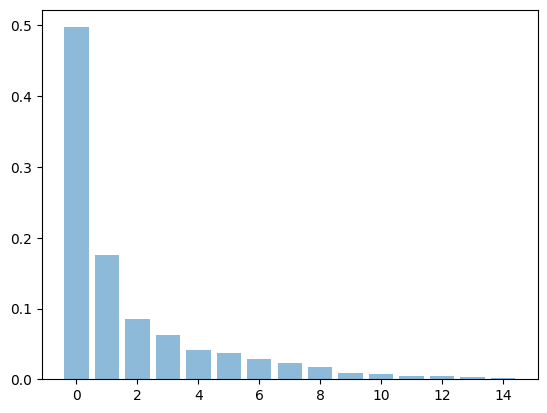

In [34]:
plt.bar(range(0,len(eigenval)), eigenval, alpha=0.5, align='center', label='Individual explained variance')

In [35]:
pca2 = PCA(n_components=2)
pca3 = PCA(n_components=3)
pca4 = PCA(n_components=4)


In [36]:
X_pca_2 = pca2.fit_transform(df_2_count_std)
# print(X_pca_2)

In [37]:
X_pca_3 = pca3.fit_transform(df_2_count_std)
# print(X_pca_3)


In [38]:
X_pca_4 = pca3.fit_transform(df_2_count_std)
# print(X_pca_4)